In [1]:
import numpy as np
from scipy.stats import norm
import numpy as np
import astropy
from astropy.io import fits
from astropy import units as u
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import healpy as hp
import pandas as pd
import math
import scipy
import statistics as st
from scipy import stats
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from IPython.display import Image

%matplotlib inline

NSIDE=2048
Npix=12*NSIDE**2

pi=math.pi

import warnings
warnings.filterwarnings('ignore')

---

### Read in inter

In [2]:
inter = pd.read_csv('intersection.csv')
inter['GLAT'] = np.around(inter['GLAT'].values,1)
inter['GLON'] = np.around(inter['GLON'].values,1)
print(inter.iloc[0,3]) # glat
print(inter.iloc[0,2]) # glon

45.1
0.0


In [3]:
# hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(inter['GLON'],inter['GLAT'],c='b',lonlat=True,s=10)

### Check against intersection mask

In [4]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-inter-cosmo_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 6)|(maskedArray.glat<-6)].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [5]:
interLons = []
interLats = []

for i in range(inter.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,inter.iloc[i][2],inter.iloc[i][3])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == inter.iloc[i][2]+j/10, maskedArray.glat == inter.iloc[i][3]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            interLons.append(inter.iloc[i][2])
            interLats.append(inter.iloc[i][3])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,inter.iloc[i][2],inter.iloc[i][3])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == inter.iloc[i][2]-j/10, maskedArray.glat == inter.iloc[i][3]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                interLons.append(inter.iloc[i][2])
                interLats.append(inter.iloc[i][3])
                break
masked = pd.DataFrame({'glon': interLons, 'glat': interLats})

0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
MATCH
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 

33 18.1 -36.4
33 18.1 -36.4
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
35 18.3 -28.5
MATCH
36 18.5 -25.7
MATCH
37 18.7 23.6
MATCH
38 18.8 -61.7
38 18.8 -61.7
38 18.8 -61.7
MATCH
39 18.8 22.4
MATCH
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
40 19.1 31.2
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0
41 19.5 -81.0


78 37.7 -46.9
78 37.7 -46.9
78 37.7 -46.9
78 37.7 -46.9
78 37.7 -46.9
MATCH
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
79 38.7 24.5
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
80 39.0 -46.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
81 39.3 -59.9
82 39.9 -40.0
82 39.9 

109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
109 48.1 -46.6
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
110 48.1 57.2
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
111 48.2 -51.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
112 48.9 -25.6
11

137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
137 57.1 -74.5
138 57.1 11.2
MATCH
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
139 57.3 -45.3
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
140 57.6 34.9
141 57.7 51.6
141 57.7 51.6

168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
168 66.3 20.8
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
169 66.3 26.1
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
170 66.4 27.0
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66.7 68.4
171 66

199 75.1 19.8
199 75.1 19.8
199 75.1 19.8
199 75.1 19.8
199 75.1 19.8
199 75.1 19.8
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
200 75.3 37.2
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
201 75.7 13.5
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3


227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
227 83.9 -55.4
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
228 83.9 85.1
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
229 84.1 58.7
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 

263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
263 90.0 34.1
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
264 90.6 33.5
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
265 90.7 -52.3
266 91.3 -38.6
MATCH
267 91.4 -51.0
267 91.4 -51.0
267 91.4 -51.0
267 91.4 -51.0
MATCH
268 91.8 -27.0
268 91.8 -27.0
268 91.8 -27.0
268 91.8 -27.0
268 91.8 -27.0
268 91.8 -27.0
268

303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
303 99.0 24.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
304 99.3 20.9
MATCH
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
305 99.5 55.6
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
306 99.6 34.2
MATCH
307 99.6

334 107.4 -31.5
334 107.4 -31.5
335 107.4 -9.6
MATCH
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
336 107.7 -58.3
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
337 107.8 -45.5
338 108.1 -9.2
MATCH
339 108.2 -11.6
MATCH
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 108.3 48.7
340 1

364 114.9 -34.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
365 115.0 70.4
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
366 115.3 -72.1
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.9
367 115.3 -54.

397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
398 125.4 -8.7
MATCH
399 125.6 32.7
MATCH
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
401 125.7 53.9
402 125.8 -18.7
402 125.8 -18.7
402 

425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
426 136.9 -53.2
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
427 136.9 59.5
428 137.5 -10.0
MATCH
429 137.

454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
454 147.9 53.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
455 148.4 75.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
456 149.2 54.2
457 149.4 -36.8
457 149.4 -36.8
457 149.4 -36.8
457 149.4 -36.8
457 149.4 -36.8
MATCH
458 149.6 -84.2
458 149.6 -84.2
458 149.6 -84.2
458 149.6 -84.2
458 149.6 

487 163.7 53.5
487 163.7 53.5
487 163.7 53.5
487 163.7 53.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
488 163.9 48.5
489 164.2 -38.9
MATCH
490 164.3 8.9
MATCH
491 164.3 -39.5
MATCH
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
492 164.7 46.4
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 165.1 54.1
493 16

525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
525 180.6 76.7
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
528 181.9 -30.8
MATCH
529 182.4 -28.3
MATCH
530 182.6 55.8
530 182.6 55.8
530 182.6 55.8
530 182.6 55.8
530 

560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
560 195.4 -29.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
561 195.6 44.1
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
562 195.8 -24.3
563 196.7 -45.5
563 196.7 -45.5
563 196.7 -45.5
563 196.7 -45.5
563 196.7 -45.

MATCH
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
588 209.8 10.2
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
589 210.0 50.9
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.0
590 210.1 -61.

619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
619 220.8 42.2
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
620 221.1 -44.1
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
621 222.5 20.6
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622 222.8 12.8
622

645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
645 229.7 78.0
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
646 229.9 15.3
MATCH
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
647 230.3 -24.4
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.1
648 230.3 -47.

673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
673 240.6 -60.4
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
674 240.8 -46.5
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
675 241.1 -28.7
676 241.8 -30.9
676 241.8 -30.9
676 241.8 -30.9
676 241.

702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
702 249.9 -21.7
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
705 250.3 -17.3
MATCH
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.0
706 250.

732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
733 256.4 44.0
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
734 256.5 -65.7
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735 256.7 42.1
735

760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
760 263.2 -33.2
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
761 263.7 -22.6
762 264.4 19.5
MATCH
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763 264.6 -51.1
763

788 271.5 36.4
788 271.5 36.4
788 271.5 36.4
788 271.5 36.4
788 271.5 36.4
788 271.5 36.4
788 271.5 36.4
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
789 271.5 -56.6
790 271.6 -12.5
MATCH
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
791 272.1 -29.1
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
792 272.1 -40.2
MATCH
793 272.1 -11.5
MATCH
794 272.2 33.

825 283.9 73.9
MATCH
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
826 284.4 52.5
827 285.0 -23.7
MATCH
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
828 285.2 16.1
MATCH
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
829 285.3 -47.4
8

856 289.1 72.2
MATCH
857 289.3 -29.0
MATCH
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
858 290.2 30.2
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
859 291.3 -55.3
860 292.0 22.9
MATCH
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.

899 304.7 -31.7
899 304.7 -31.7
899 304.7 -31.7
899 304.7 -31.7
MATCH
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
900 304.8 -41.4
MATCH
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
901 304.9 45.4
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
902 305.6 -42.8
90

931 313.9 -17.1
931 313.9 -17.1
931 313.9 -17.1
931 313.9 -17.1
931 313.9 -17.1
931 313.9 -17.1
931 313.9 -17.1
932 314.3 -55.4
932 314.3 -55.4
932 314.3 -55.4
932 314.3 -55.4
MATCH
933 314.5 13.5
MATCH
934 314.8 -28.6
MATCH
935 315.0 10.1
MATCH
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
MATCH
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
MATCH
938 315.7 -28.6
MATCH
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
939 315.7 -18.0
940 316.3 28.5
940 316.3 28.5
940 3

966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
966 328.1 15.8
MATCH
967 328.2 18.2
967 328.2 18.2
967 328.2 18.2
967 328.2 18.2
967 328.2 18.2
967 328.2 18.2
967 328.2 18.2
MATCH
968 328.3 -9.7
MATCH
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
969 328.6 -25.3
MATCH
970 329.4 -9.9
MATCH
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7
971 329.5 -22.7


1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1003 341.4 -40.2
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1004 342.3 -34.9
1005 342.5 24.1
MATCH
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1006 342.8 -30.5
1007 343.3 83.2
1007 343.3 83.2
1007 343.3 83.2
1007 343.3 83.2
1007 343.3 83.2
1007 343.3 83.

1030 357.4 69.5
1030 357.4 69.5
1030 357.4 69.5
1030 357.4 69.5
1030 357.4 69.5
1030 357.4 69.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1031 358.2 -87.5
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1032 358.3 -47.3
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
1033 358.9 -70.6
103

flip it, check pixels against each other<br>
label pixels such that you can go back and check richness and such<br>
healpix where statement

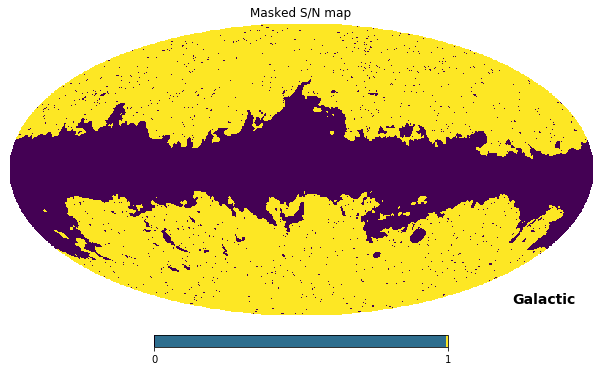

In [7]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(inter['GLON'],inter['GLAT'],c='b',lonlat=True,s=10)
# hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
# hp.visufunc.projscatter(interLons, interLats,c='k',lonlat=True,s=10)

### Check against union mask

In [9]:
mask = hp.read_map('HFI_PCCS_SZ-selfunc-union-survey_2.02.fits')

# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 3)|(maskedArray.glat<-3)].reset_index()

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [8]:
# Get the nside and number of pixels in your map
nside = hp.get_nside(mask)
npix = hp.nside2npix(nside)
maskedPixels, = np.where(mask == 0)

# Use pix2ang to get the (l, b) coordinates for each pixel
glons, glats = hp.pix2ang(nside, maskedPixels, lonlat=True)
maskedArray = pd.DataFrame({'glon': np.around(glons,1), 'glat': np.around(glats,1)})
maskedArray = maskedArray[(maskedArray.glat > 12)|((maskedArray.glat<-12) & (maskedArray.glon<180))].reset_index()

In [9]:
unionLons = []
unionLats = []

for i in range(inter.shape[0]):
    matchFlag=False
    for j in range(11): # Within 1 degree
        print(i,inter.iloc[i][2],inter.iloc[i][3])
        if not maskedArray.loc[np.logical_and(maskedArray.glon == inter.iloc[i][2]+j/10, maskedArray.glat == inter.iloc[i][3]+j/10)].empty:
            print("MATCH")
            matchFlag=True
            unionLons.append(inter.iloc[i][2])
            unionLats.append(inter.iloc[i][3])
            break
    if not matchFlag:
        for j in range(11): # Within 1 degree
            print(i,inter.iloc[i][2],inter.iloc[i][3])
            if not maskedArray.loc[np.logical_and(maskedArray.glon == inter.iloc[i][2]-j/10, maskedArray.glat == inter.iloc[i][3]-j/10)].empty:
                print("MATCH")
                matchFlag=True
                unionLons.append(inter.iloc[i][2])
                unionLats.append(inter.iloc[i][3])
                break
masked = pd.DataFrame({'glon': unionLons, 'glat': unionLats})

0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
0 0.0 45.1
MATCH
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
1 0.1 78.0
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
2 0.4 -41.9
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
3 0.8 -35.7
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 -56.2
4 2.8 

31 14.1 38.4
31 14.1 38.4
31 14.1 38.4
31 14.1 38.4
31 14.1 38.4
31 14.1 38.4
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
32 14.7 -62.5
MATCH
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
33 18.1 -36.4
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
34 18.2 -60.0
35 18.3 -28.5
35 18.3 -28.5
35 18.3 -28.5
35 18.3 -28.5
35 18.

62 29.8 -17.4
62 29.8 -17.4
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
63 31.4 -19.2
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
64 31.9 78.7
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
65 32.1 -15.0
66 32.3 66.1
66 32.3 66.1
66 32.3 66.1
66 32.3 66.1
66 32.3 66.1
66 32

92 43.4 -41.3
92 43.4 -41.3
92 43.4 -41.3
92 43.4 -41.3
92 43.4 -41.3
92 43.4 -41.3
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
93 44.2 48.7
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
94 44.5 -65.4
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
95 44.6 -20.5
96 44.8 -51.3


120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
120 50.4 31.2
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
121 50.5 67.5
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
122 53.4 -36.3
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.5
123 53.5 59.

147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
147 58.8 -49.7
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
148 59.5 33.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
149 59.8 -39.1
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
150 60.0 -18.7
15

174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
174 67.5 34.8
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
175 67.9 -32.3
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
176 68.2 15.2
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.8
177 68.4 81.

202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
202 76.2 -47.3
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
203 76.4 23.5
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
204 76.6 60.3
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 -65.5
205 77.2 

230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
230 84.1 -35.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
231 84.4 -12.4
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
232 84.5 12.6
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
233 84.6 -15.9
23

258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
258 89.1 -11.8
259 89.5 -58.1
259 89.5 -58.1
MATCH
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
260 89.5 62.3
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
261 89.8 -39.6
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -43.9
262 90.0 -4

288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
288 95.5 16.4
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
289 95.7 -50.0
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
290 96.1 56.2
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291 96.4 -20.9
291

318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
318 103.0 -4.8
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
319 103.4 -33.0
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
320 103.6 24.8
321 104.3 26.2
321 104.3 26.2
321 104.3 26.2
321

344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
344 110.0 52.8
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
345 110.0 -70.3
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87.5
346 110.3 -87

370 116.5 -44.5
370 116.5 -44.5
370 116.5 -44.5
370 116.5 -44.5
370 116.5 -44.5
370 116.5 -44.5
370 116.5 -44.5
MATCH
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
371 116.8 -9.9
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
372 117.0 -53.6
MATCH
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
373 117.4 -52.5
374 118.0 -55.9
374 118.0 -55.9
37

397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
397 125.3 -28.0
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
398 125.4 -8.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
399 125.6 32.7
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 125.7 -64.1
400 

422 135.2 57.9
422 135.2 57.9
422 135.2 57.9
422 135.2 57.9
422 135.2 57.9
422 135.2 57.9
422 135.2 57.9
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
423 135.7 32.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
424 136.3 -44.5
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 136.6 -25.0
425 1

448 145.2 32.1
448 145.2 32.1
448 145.2 32.1
448 145.2 32.1
448 145.2 32.1
448 145.2 32.1
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
449 145.9 -12.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
450 146.0 -49.5
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.6
451 146.4 -15.

474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
474 156.9 13.5
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
475 157.3 -26.8
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
476 157.4 30.3
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477 157.6 78.0
477

501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
501 167.7 -65.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
502 167.7 17.6
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
503 168.0 -60.0
504 168.3 69.7

526 181.1 48.5
526 181.1 48.5
526 181.1 48.5
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
527 181.7 -68.7
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
528 181.9 -30.8
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -28.3
529 182.4 -

551 191.0 6.7
551 191.0 6.7
551 191.0 6.7
551 191.0 6.7
551 191.0 6.7
551 191.0 6.7
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
552 191.6 -28.0
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
553 191.8 -26.6
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
554 192.2 56.1
55

577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
577 204.7 15.9
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
578 205.1 -63.0
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -44.2
579 205.6 -4

602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
602 213.4 80.6
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
603 214.1 23.2
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
604 215.2 -49.7
605

627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
627 224.0 69.3
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
628 224.0 -11.1
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
629 224.4 -25.0
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5
630 224.4 -76.5


652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
652 231.7 -7.8
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
653 231.7 -70.6
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
654 232.5 -17.4
655 232.8 38.1
655 232.8 38.1
655 232.8 38.1
655 232.8 38.1
655 232.8 38.1
655 232.8 38.1
655 232.8 38.1
655 232.8 3

677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
677 241.8 -24.0
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
678 241.9 7.8
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
679 242.0 14.9
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 242.1 10.4
680 

703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
703 249.9 -39.9
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
704 250.0 24.1
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
705 250.3 -17.3
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.0
706 250.6 -25.

729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
729 255.5 -35.7
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
730 255.6 -46.2
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
731 255.6 -25.3
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.8
732 256.2 34.

754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
754 262.4 -25.2
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
755 262.7 -40.9
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
756 262.8 25.8
757 263.0 45.7
757 263.0 45.7
757 263.0 45.7
757 263.0 45.7
75

779 269.4 -47.2
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
780 269.8 -64.4
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
781 270.5 -14.5
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.6 -35.7
782 270.

805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
805 276.8 -59.8
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
806 277.8 -51.7
807 277.9 12.3
807 277.9 12.3
807 277.9 12.3
807 277.9 12.3
807 277.9 12.3
807 277.9 12.3
MATCH
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.3 -41.5
808 278.

834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
834 285.9 -74.9
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
835 286.3 -38.4
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
836 286.4 64.1
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.2
837 286.6 -31.

860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
860 292.0 22.9
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
861 292.2 -43.3
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.1
862 292.4 -57.

884 297.6 -11.9
884 297.6 -11.9
884 297.6 -11.9
884 297.6 -11.9
884 297.6 -11.9
884 297.6 -11.9
884 297.6 -11.9
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
885 297.8 26.0
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
886 297.9 31.4
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 298.0 -67.7
887 

910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
910 306.8 58.6
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
911 307.6 -10.7
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
912 307.7 -77.9
913 308.3 -20.2
913 308.3 

934 314.8 -28.6
934 314.8 -28.6
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
935 315.0 10.1
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
936 315.4 38.5
MATCH
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -37.0
937 315.6 -

960 325.0 -49.3
960 325.0 -49.3
960 325.0 -49.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
961 325.7 17.3
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
962 326.7 54.8
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327.3 11.1
963 327

986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
986 337.0 38.3
MATCH
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
987 337.1 -66.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
988 337.1 -26.0
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 -12.6
989 337.2 

1013 346.9 -45.4
1013 346.9 -45.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1014 347.2 -27.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1015 347.6 -35.4
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25.5
1016 348.4 -25

1036 359.6 -8.7
1036 359.6 -8.7
1036 359.6 -8.7
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2
1037 359.7 -7.2


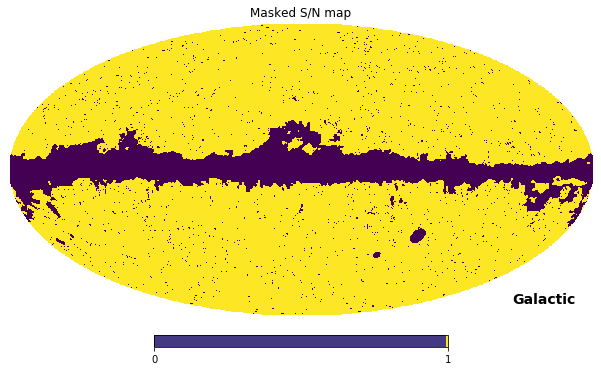

In [10]:
hp.mollview(mask,norm='hist',coord=['G'],title='Masked S/N map')
# hp.visufunc.projscatter(inter['GLON'],inter['GLAT'],c='cyan',lonlat=True,s=10)
# hp.visufunc.projscatter(maskedArray.glon,maskedArray.glat,c='w',lonlat=True,s=0.1)
# hp.visufunc.projscatter(unionLons, unionLats,c='k',lonlat=True,s=10)

In [11]:
len(interLons)

319

In [12]:
len(unionLons)

90